# Veri Ön-İşleme (Data Preprocessing)

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import missingno as msno

from mlxtend.frequent_patterns import apriori, association_rules

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv("KaggleCovidDataset.csv")
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
df.shape #Satır ve sütun sayısını inceleriz.

(5434, 21)

In [4]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [5]:
df.values

array([['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'Yes'],
       ['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'Yes'],
       ['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'Yes'],
       ...,
       ['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'No'],
       ['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'No'],
       ['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'No']], dtype=object)

In [6]:
df.info() #Değişken değerlerini inceleriz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

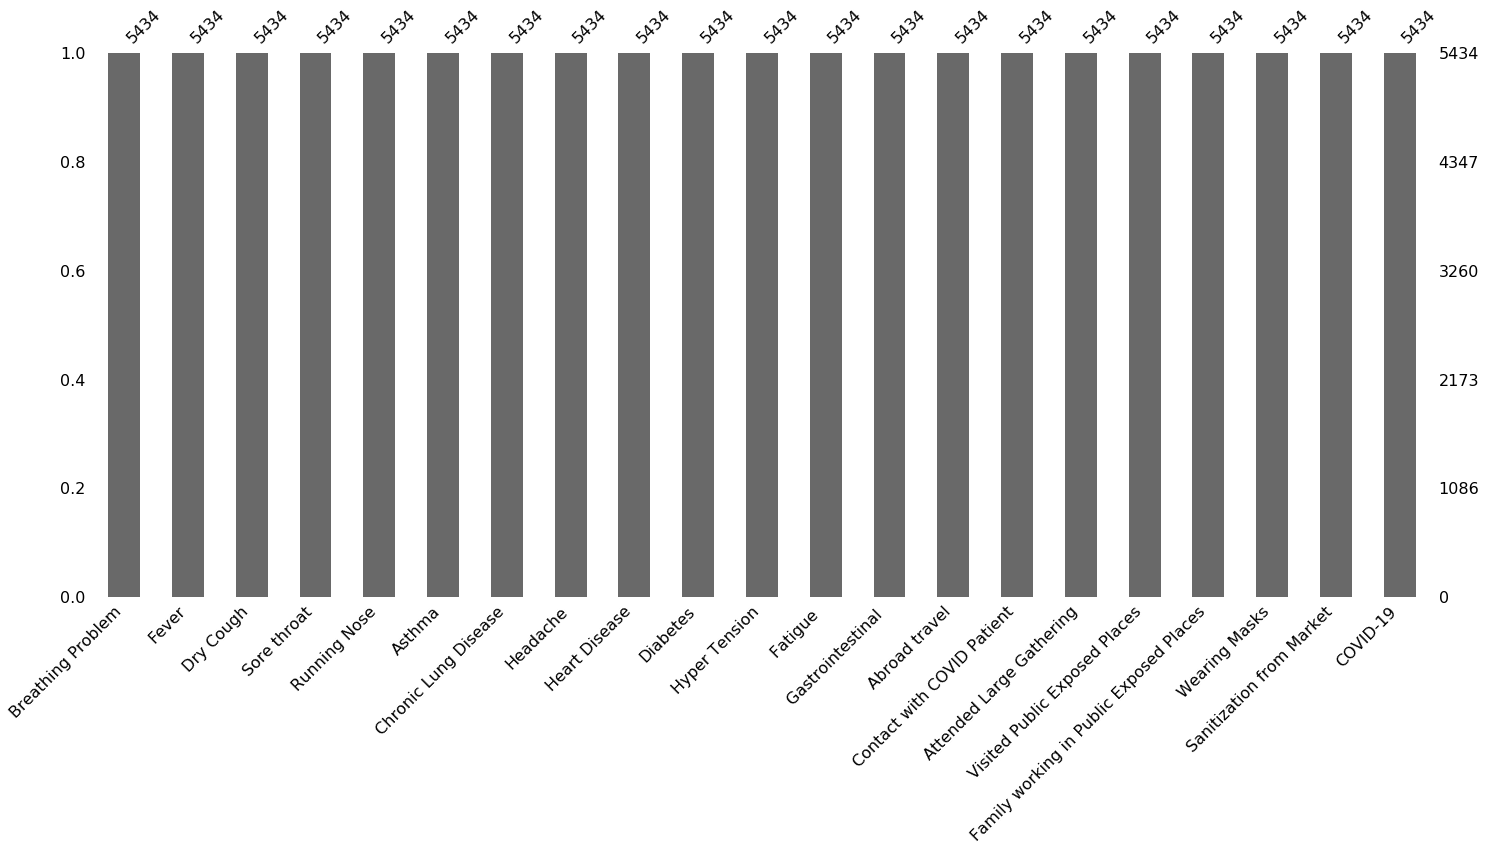

In [7]:
msno.bar(df)  #Eksik değer varsa gösteren grafik.
plt.show()

In [8]:
df.isnull().sum() # Eksik değer var mı diye kontrol ederiz.

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

# Apriori Algoritmasının Uygulanması

Apriori algoritması True/False ya da 1/0 değerleriyle çalışmaktadır.
Veri setimizdeki değerler Yes ve No'dur.
Yes = 1, No = 0 olarak çeviririz.

In [9]:
df = df.applymap(lambda x : 1 if x == "Yes" else 0)

In [10]:
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df = apriori(df, min_support = 0.2, use_colnames = True, verbose = 1)

Processing 348 combinations | Sampling itemset size 65


In [12]:
df

,support,itemsets
0,0.666176,(Breathing Problem)
1,0.786345,(Fever)
2,0.792602,(Dry Cough)
3,0.727457,(Sore throat)
4,0.543246,(Running Nose)
...,...,...
775,0.203717,"(Fever, Dry Cough, Abroad travel, Sore throat,..."
776,0.248620,"(Fever, Dry Cough, Sore throat, COVID-19, Cont..."
777,0.223408,"(Attended Large Gathering, Fever, Dry Cough, S..."
778,0.226353,"(Fever, Dry Cough, Sore throat, Visited Public..."


# Birliktelik Kurallarının Elde Edilmesi

In [13]:
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Fever),(Breathing Problem),0.786345,0.666176,0.541222,0.688275,1.033173,0.017378,1.070894
1,(Breathing Problem),(Fever),0.666176,0.786345,0.541222,0.812431,1.033173,0.017378,1.139073
2,(Dry Cough),(Breathing Problem),0.792602,0.666176,0.558520,0.704667,1.057779,0.030508,1.130330
3,(Breathing Problem),(Dry Cough),0.666176,0.792602,0.558520,0.838398,1.057779,0.030508,1.283385
4,(Sore throat),(Breathing Problem),0.727457,0.666176,0.548399,0.753858,1.131620,0.063785,1.356225
...,...,...,...,...,...,...,...,...,...
2894,"(Contact with COVID Patient, Visited Public Ex...","(Dry Cough, COVID-19, Sore throat)",0.244387,0.593301,0.200957,0.822289,1.385955,0.055962,2.288541
2895,"(Dry Cough, Visited Public Exposed Places, Con...","(Sore throat, COVID-19, Fever)",0.250092,0.596430,0.200957,0.803532,1.347236,0.051795,2.054127
2896,"(Contact with COVID Patient, Visited Public Ex...","(Dry Cough, COVID-19, Fever)",0.239234,0.611152,0.200957,0.840000,1.374453,0.054748,2.430300
2897,"(Contact with COVID Patient, Visited Public Ex...","(Dry Cough, Sore throat, Fever)",0.278064,0.526132,0.200957,0.722700,1.373611,0.054659,1.708866


In [14]:
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Fever),(Breathing Problem),0.786345,0.666176,0.541222,0.688275,1.033173,0.017378,1.070894
1,(Breathing Problem),(Fever),0.666176,0.786345,0.541222,0.812431,1.033173,0.017378,1.139073
2,(Dry Cough),(Breathing Problem),0.792602,0.666176,0.558520,0.704667,1.057779,0.030508,1.130330
3,(Breathing Problem),(Dry Cough),0.666176,0.792602,0.558520,0.838398,1.057779,0.030508,1.283385
4,(Sore throat),(Breathing Problem),0.727457,0.666176,0.548399,0.753858,1.131620,0.063785,1.356225
...,...,...,...,...,...,...,...,...,...
2894,"(Contact with COVID Patient, Visited Public Ex...","(Dry Cough, COVID-19, Sore throat)",0.244387,0.593301,0.200957,0.822289,1.385955,0.055962,2.288541
2895,"(Dry Cough, Visited Public Exposed Places, Con...","(Sore throat, COVID-19, Fever)",0.250092,0.596430,0.200957,0.803532,1.347236,0.051795,2.054127
2896,"(Contact with COVID Patient, Visited Public Ex...","(Dry Cough, COVID-19, Fever)",0.239234,0.611152,0.200957,0.840000,1.374453,0.054748,2.430300
2897,"(Contact with COVID Patient, Visited Public Ex...","(Dry Cough, Sore throat, Fever)",0.278064,0.526132,0.200957,0.722700,1.373611,0.054659,1.708866


**antecedents ve consequents değerleri frozenset olduğu için bu değerleri daha iyi anlayabilmek adına string'e çevirmek gerekir.**

In [15]:
df_ar["antecedents"] = df_ar["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
df_ar["consequents"] = df_ar["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [16]:
df_ar.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Fever,Breathing Problem,0.786345,0.666176,0.541222,0.688275,1.033173,0.017378,1.070894
1,Breathing Problem,Fever,0.666176,0.786345,0.541222,0.812431,1.033173,0.017378,1.139073
2,Dry Cough,Breathing Problem,0.792602,0.666176,0.558520,0.704667,1.057779,0.030508,1.130330
3,Breathing Problem,Dry Cough,0.666176,0.792602,0.558520,0.838398,1.057779,0.030508,1.283385
4,Sore throat,Breathing Problem,0.727457,0.666176,0.548399,0.753858,1.131620,0.063785,1.356225


In [17]:
df_ar.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
658,"Abroad travel, Asthma",COVID-19,0.225616,0.806588,0.225616,1.000000,1.239790,0.043637,inf
1448,"Dry Cough, Attended Large Gathering, Fever",COVID-19,0.330880,0.806588,0.330880,1.000000,1.239790,0.063996,inf
1588,"Running Nose, Abroad travel, Fever",COVID-19,0.222672,0.806588,0.222672,1.000000,1.239790,0.043067,inf
1198,"Attended Large Gathering, Sore throat, Breathi...",COVID-19,0.312661,0.806588,0.312661,1.000000,1.239790,0.060472,inf
1178,"Abroad travel, Sore throat, Breathing Problem",COVID-19,0.278432,0.806588,0.278432,1.000000,1.239790,0.053852,inf
...,...,...,...,...,...,...,...,...,...
2002,"Fever, Asthma","Dry Cough, COVID-19, Breathing Problem",0.378911,0.530180,0.227641,0.600777,1.133156,0.026750,1.176835
695,"Contact with COVID Patient, COVID-19",Attended Large Gathering,0.475156,0.461907,0.285425,0.600697,1.300473,0.065947,1.347582
2888,"Visited Public Exposed Places, Sore throat, CO...","Dry Cough, Contact with COVID Patient",0.334560,0.423629,0.200957,0.600660,1.417892,0.059228,1.443309
289,Chronic Lung Disease,"Dry Cough, Fever",0.472028,0.644461,0.283401,0.600390,0.931616,-0.020803,0.889715


**Kesin olan sonuçlar için confidence = 1 olan değerlere bakmamız gerekir.**

In [18]:
df_confidence = df_ar.loc[df_ar['confidence'] == 1]

In [19]:
df_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
85,Abroad travel,COVID-19,0.451049,0.806588,0.451049,1.0,1.23979,0.087238,inf
255,"Abroad travel, Breathing Problem",COVID-19,0.328119,0.806588,0.328119,1.0,1.23979,0.063462,inf
267,"Attended Large Gathering, Breathing Problem",COVID-19,0.354803,0.806588,0.354803,1.0,1.23979,0.068623,inf
434,"Abroad travel, Fever",COVID-19,0.380935,0.806588,0.380935,1.0,1.23979,0.073677,inf
444,"Attended Large Gathering, Fever",COVID-19,0.377622,0.806588,0.377622,1.0,1.23979,0.073037,inf
...,...,...,...,...,...,...,...,...,...
2715,"Dry Cough, Contact with COVID Patient, Attende...",COVID-19,0.209606,0.806588,0.209606,1.0,1.23979,0.040540,inf
2724,"Dry Cough, Visited Public Exposed Places, Cont...",COVID-19,0.216231,0.806588,0.216231,1.0,1.23979,0.041822,inf
2784,"Fever, Dry Cough, Abroad travel, Sore throat, ...",COVID-19,0.203717,0.806588,0.203717,1.0,1.23979,0.039401,inf
2831,"Attended Large Gathering, Fever, Dry Cough, So...",COVID-19,0.223408,0.806588,0.223408,1.0,1.23979,0.043210,inf


In [20]:
writer = pd.ExcelWriter('CovidSymptoms.xlsx')
df_confidence.to_excel(writer)
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


**Support, lift, confidence değerlerini görselleştirerek inceleyebiliriz.**

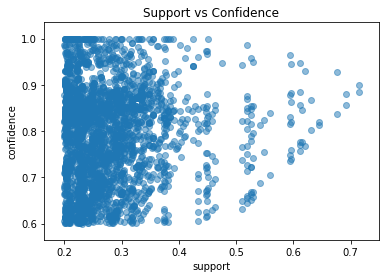

In [21]:
# Support vs Confidence
plt.scatter(df_ar['support'], df_ar['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

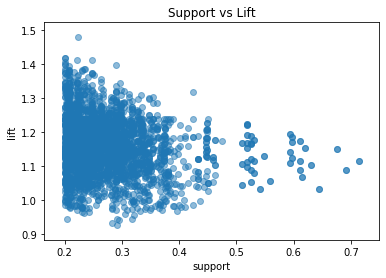

In [22]:
# Support vs Lift
plt.scatter(df_ar['support'], df_ar['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


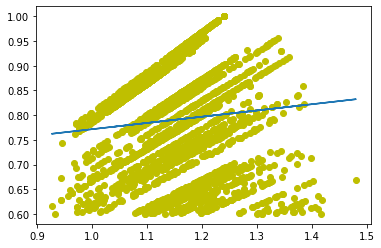

In [23]:
# Lift vs Confidence
fit = np.polyfit(df_ar['lift'], df_ar['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(df_ar['lift'], df_ar['confidence'], 'yo', df_ar['lift'], 
fit_fn(df_ar['lift']))